In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#get_ipython().run_line_magic('matplotlib','inline')
%matplotlib inline
data=pd.read_csv('brain_size.csv',sep=';',na_values=".")
data.head(5) #show the data

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [8]:
groupy_gender=data.groupby('Gender')
groupy_gender.describe()

FSIQ                                                      Height  \
       count   mean        std   min    25%    50%     75%    max  count   
Gender                                                                     
Female  20.0  111.9  23.686327  77.0  90.25  115.5  133.00  140.0   20.0   
Male    20.0  115.0  24.986312  80.0  89.75  118.0  139.25  144.0   19.0   

                   ...      VIQ        Weight                                \
             mean  ...      75%    max  count        mean        std    min   
Gender             ...                                                        
Female  65.765000  ...    129.0  136.0   20.0  137.200000  16.953807  106.0   
Male    71.431579  ...    145.0  150.0   18.0  166.444444  20.047656  132.0   

                                      
           25%    50%     75%    max  
Gender                                
Female  125.75  138.5  146.25  175.0  
Male    148.75  172.0  180.75  192.0  

[2 rows x 56 columns]

In [10]:
data.iloc[:,2:].corr()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


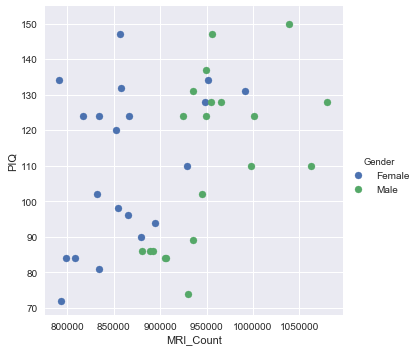

In [15]:
sns.FacetGrid(data, hue="Gender",size=5) \
.map(plt.scatter,'MRI_Count','PIQ') \
.add_legend()

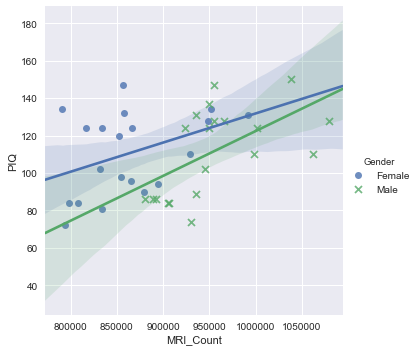

In [19]:
sns.lmplot(x='MRI_Count',y='PIQ',hue='Gender',data=data, markers=["o","x"])

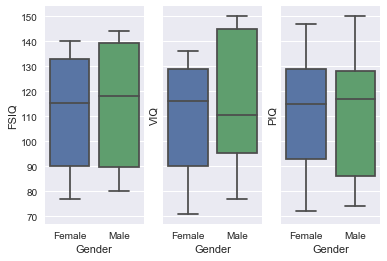

In [22]:
fig, axs=plt.subplots(1,3,sharey=True)
sns.boxplot(x=data.Gender,y=data['FSIQ'],ax=axs[0])
sns.boxplot(x=data.Gender, y=data['VIQ'], ax=axs[1])
sns.boxplot(x=data.Gender, y=data['PIQ'], ax=axs[2])

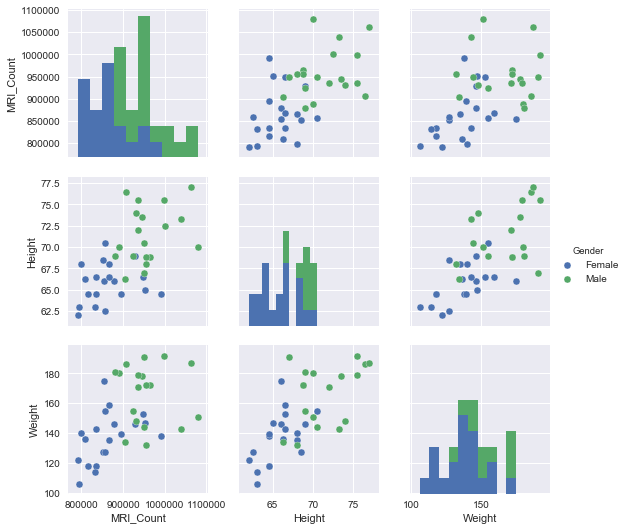

In [23]:
sns.pairplot(data[['MRI_Count','Height','Weight','Gender']], hue="Gender")

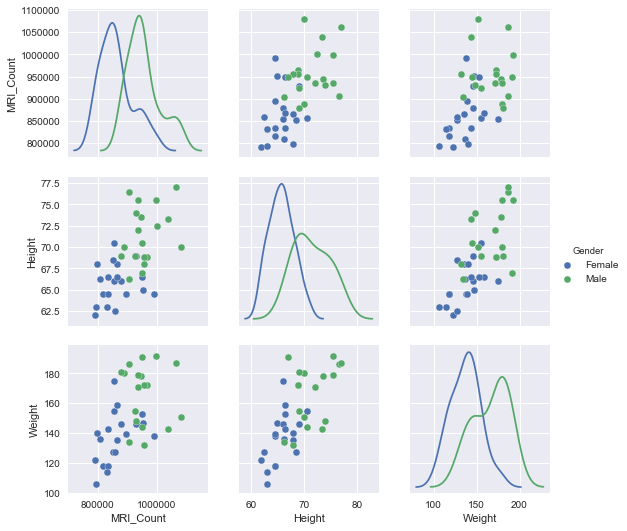

In [25]:
# The diagonal elements in a pairplot show the histogram by default
# We can update these elements to show other things, such as a kde
sns.pairplot(data[['MRI_Count','Height','Weight','Gender']], hue="Gender", diag_kind="kde")

In [26]:
from statsmodels.formula.api import ols
model =ols('PIQ~ MRI_Count + Height',data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    PIQ   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     7.705
Date:                Fri, 08 Sep 2017   Prob (F-statistic):            0.00164
Time:                        11:52:35   Log-Likelihood:                -169.12
No. Observations:                  39   AIC:                             344.2
Df Residuals:                      36   BIC:                             349.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    109.1891     54.283      2.011      0.0